In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_blobs

import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [26]:
from tensorflow.keras.datasets import mnist

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
from PIL import Image

In [5]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [7]:
model = Sequential()

In [8]:
model.add(Dense(400,activation="relu", input_shape=(784,), name='l1'))
model.add(Dense(200,activation="relu", name='l2'))
model.add(Dense(100,activation="relu", name='l3'))
model.add(Dense(50,activation="relu", name='l4'))
model.add(Dense(10,activation="softmax", name='l5'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 400)               314000    
_________________________________________________________________
l2 (Dense)                   (None, 200)               80200     
_________________________________________________________________
l3 (Dense)                   (None, 100)               20100     
_________________________________________________________________
l4 (Dense)                   (None, 50)                5050      
_________________________________________________________________
l5 (Dense)                   (None, 10)                510       
Total params: 419,860
Trainable params: 419,860
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [11]:
model.fit(X_train, y_train, epochs=10)

Train on 13399 samples
Epoch 1/10
13399/13399 [==============================] - 3s 228us/sample - loss: 1.8035 - accuracy: 0.8032
Epoch 2/10
13399/13399 [==============================] - 2s 180us/sample - loss: 0.3118 - accuracy: 0.9214
Epoch 3/10
13399/13399 [==============================] - 2s 183us/sample - loss: 0.2104 - accuracy: 0.9430
Epoch 4/10
13399/13399 [==============================] - 2s 172us/sample - loss: 0.1535 - accuracy: 0.9547
Epoch 5/10
13399/13399 [==============================] - 2s 168us/sample - loss: 0.1492 - accuracy: 0.9590
Epoch 6/10
13399/13399 [==============================] - 2s 169us/sample - loss: 0.1365 - accuracy: 0.9614
Epoch 7/10
13399/13399 [==============================] - 2s 169us/sample - loss: 0.1101 - accuracy: 0.9670
Epoch 8/10
13399/13399 [==============================] - 2s 170us/sample - loss: 0.1332 - accuracy: 0.9639
Epoch 9/10
13399/13399 [==============================] - 2s 175us/sample - loss: 0.1290 - accuracy: 0.9664
Epoch

6

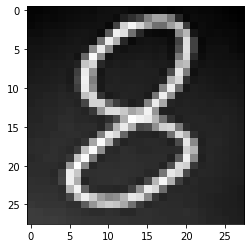

In [25]:
img = Image.open('../datasets/nums/eight.jpeg')

img = img.resize(size=(28, 28))

new = 255 - np.array(img).mean(axis=2)

plt.imshow(new, cmap='gray')

model.predict(np.array([new.flatten()])).argmax()